# 0x00 Introduction

## Introduction

**Name**: Handi Xie  
**Email**: hxie13@bu.edu  
**LinkedIn**: https://www.linkedin.com/in/handi-xie

This is my attempt to compete for BitGrit's Competition #18. I have used an employeed both classical machine learning methods, deep learning methods and ensemble methods for the competition, and utilized Google Colab's Pro+ for my development. If you ran into any trouble, please feel free to contact me by my email or linkedin.

**Competition**: BitGrit's Competition #18
> Generative AI Competition: Detect the AI-generated photos  
> https://bitgrit.net/competition/18

**Requirments**

* Google Colab

* .pkl files and .zip files in /models

**Instructions**

Please follow instructions on the ipynb as it contains both instructions on how the data pipeline works and the code for the data pipeline.

**Warning**

Pleaes don't run 0x03 Model Training since training and tuning models take time and computational units. Please load from /models.

**Architecture**

I have used the ensemble stacking model for my final submission.

For base estimators (level 0), I have used **PyCaret** to create a list of traditional machine learning models: CatBoost, LightGBM, Linear Regression, K Nearest Neighbours, Multiple Layered Perceptions, XGBoost. I have also used **TabNet**, a SOTA neural network model for tabular data developed by Google.

For meta estimator (level 1), I have used, Logistic Regression from scikit learn.

**Sketch of Architecture:**

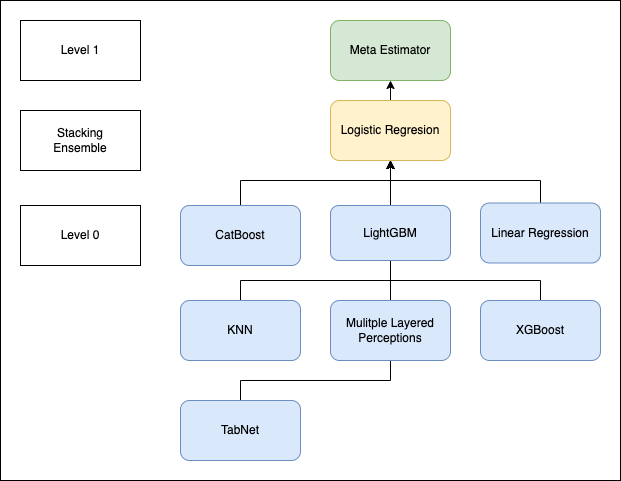

## Problem Statement

> In a world where most services are available online, identity verification is crucial to ensure that only real individuals can access and use these services. However, with the rise of generative AI, fake identities can be easily created using sophisticated algorithms. This has led to an increase in identity fraud, as fake identities can be used to gain access to online services and commit fraudulent activities.
>
> To address this issue, a leading tech company is looking for an algorithm that can accurately distinguish between real and fake profile photos produced by generative AI. This machine learning competition is open to participants from all over the world, challenging them to develop a model that can identify a fake photo created by AI. The winning model might be integrated into the company's online services, helping to prevent identity fraud and protect the integrity of online transactions.
>
> Through this competition, participants have the opportunity to use their machine-learning skills to address a critical issue in today's online world, contributing to the development of more secure and reliable online services for everyone.
>
> The goal of this competition is to develop a model that can identify a fake photo created by AI.

## Data Breakdown

>The goal of this competition is to develop a model that can identify a fake photo created by AI.
>
>To build your machine learning model, we have provided the following datasets:
>
> 1. train.csv: file to train your machine learning model (labels: target variable with 0 being 'real' and 1 being 'fake')
>
> 2. test.csv: file that can be used to test how well your model performs on unseen data. This is the file you're going to make predictions on with your trained model and create a submission file.
>
> 3. solution_format: Example of the format that the submission file needs to be in to be properly scored
>
>All the images in the datasets are 20 x 20 x 3 (channels). The underlying data is all processed so you cannot convert them back to the original images. The goal of this competition is to predict the ‘labels’ column using the data provided.
>
>NOTE: You may upload a submission file up to 5 times a day.
>
>The evaluation metric used is F1 score.
>
>Final competition results are based on the Private Leaderboard results, and the winner will be the user at the top of the Private Leaderboard.



## Setup
* Google Colab
* Pro or Pro+ for more computational resources

# 0x01 Colab Environment Setup

Please mount your Google Drive. If mounted successful, you would see /drive under the Files.


In [ ]:
# If you need to mount it with google.colab's API, please uncomment and run.
# Otherwise, please use Colab's Web GUI on the left bar (folder logo).
from google.colab import drive, files
drive.mount('/content/drive')

In [ ]:
import subprocess
# Check available computation units for estimation
print((subprocess.check_output("lscpu", shell=True).strip()).decode())

Architecture:                    x86_64
CPU op-mode(s):                  32-bit, 64-bit
Byte Order:                      Little Endian
Address sizes:                   46 bits physical, 48 bits virtual
CPU(s):                          8
On-line CPU(s) list:             0-7
Thread(s) per core:              2
Core(s) per socket:              4
Socket(s):                       1
NUMA node(s):                    1
Vendor ID:                       GenuineIntel
CPU family:                      6
Model:                           85
Model name:                      Intel(R) Xeon(R) CPU @ 2.00GHz
Stepping:                        3
CPU MHz:                         2000.178
BogoMIPS:                        4000.35
Hypervisor vendor:               KVM
Virtualization type:             full
L1d cache:                       128 KiB
L1i cache:                       128 KiB
L2 cache:                        4 MiB
L3 cache:                        38.5 MiB
NUMA node0 CPU(s):               0-7
Vulnerabilit

In [ ]:
# Making sure GPU is connected to the instance.
!nvidia-smi

Fri Jun 30 07:21:47 2023       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 525.85.12    Driver Version: 525.85.12    CUDA Version: 12.0     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   56C    P8    10W /  70W |      0MiB / 15360MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

# 0x02 Data Preperation

## Loading Data - Part 1

In [ ]:
import pandas as pd
import numpy as np
import os
from google.colab import drive, files

# Please upload the test.csv, train.csv and solution_format.csv from the competition.
# Then modify your path to setup File I/O

# List of global variables for data path and model path

# PLEASE MODIFY THIS PATH
# Google Drive path
gdrive_path = '/content/drive/MyDrive/Colab Notebooks/Competition/CS523'

# Data path
data_path = gdrive_path + '/Dataset'
test_path = data_path + '/test.csv'
train_path = data_path + '/train.csv'
solution_format_path = data_path + '/solution_format.csv'

# Model path
src_path = '/content/'
dst_path = gdrive_path + '/models/'

# Data in DataFrame and Numpy Arrays
train_df = pd.read_csv(train_path)
unseen_df = pd.read_csv(test_path)
solution_df = pd.read_csv(solution_format_path)

In [ ]:
# Convient get_time function with Eastern Time for file naming.
def get_time():
    from datetime import datetime, timedelta

    now = datetime.now()
    now_eastern = now - timedelta(hours=4)
    current_time = now_eastern.strftime("%y%m%d_%H%M%S")
    return current_time

## PyCaret Setup
Please install PyCaret through pip or github, initial installment might take a few minutes.  
  
PyCaret:  
> An open-source, low-code machine learning library in Python  
> PyCaret is essentially a Python wrapper around several machine learning libraries and frameworks, such as scikit-learn, XGBoost, LightGBM, CatBoost, spaCy, Optuna, Hyperopt, Ray, and a few more.

I have chosen PyCaret to speed up Experiment and quickly iterate models.  
Please see more about Pycaret from its offical website: https://pycaret.gitbook.io/docs/ or from my slides.

In [ ]:
%%capture
!pip install pycaret --quiet
!pip install pycaret[models] --quiet
!pip install pycaret[analysis] --quiet
# !pip install interpret-community --quiet
# Please do not run "!pip install pycaret[full]"" as there are version conflicts.

In [ ]:
# Setup PyCaret Experiment
from pycaret.classification import *

# "This function initializes the training environment and creates the transformation pipeline.
#  Setup function must be called before executing any other function.
#  It takes two mandatory parameters: data and target. All the other parameters are optional."
s = setup(data=train_df, target='labels', use_gpu=True, session_id=7, experiment_name='pycaret_ensemble')

# Stored the following output for further usage"
s_info = pull()

# Set Seed
set_config('seed', 42)

,Description,Value
0,Session id,7
1,Target,labels
2,Target type,Binary
3,Original data shape,"(5250, 1201)"
4,Transformed data shape,"(5250, 1201)"
5,Transformed train set shape,"(3674, 1201)"
6,Transformed test set shape,"(1576, 1201)"
7,Numeric features,1200
8,Preprocess,True
9,Imputation type,simple


## Loading Data - Part 2
Although PyCaret already set up the Train DataFrame in s.train and Validation DataFrame in s.train, they need to manually passed to X_train, X_valid, y_train, and y_valid for using other models beside PyCaret.

In [ ]:
# Split your data into training and validation sets
X_train = s.train.loc[:,'f_0':'f_1199'].to_numpy()
X_valid = s.test.loc[:,'f_0':'f_1199'].to_numpy()
y_train = s.train.loc[:,'labels'].to_numpy().astype(int)
y_valid = s.test.loc[:,'labels'].to_numpy().astype(int)

In [ ]:
# The Prediction Set X_unseen
X_unseen = unseen_df.loc[:,'f_0':'f_1199'].to_numpy()
X_unseen.shape

(2250, 1200)

## Exploratory Data Analysis
Performs a data inspection to see which data preprocessing need to be performed

In [ ]:
train_df.head()

,labels,f_0,f_1,f_2,f_3,f_4,f_5,f_6,f_7,f_8,...,f_1190,f_1191,f_1192,f_1193,f_1194,f_1195,f_1196,f_1197,f_1198,f_1199
0,0,-2.033875,0.978446,-0.142131,-0.177117,-1.470684,1.669562,-0.196530,-0.125239,-0.452284,...,-1.111266,0.716084,0.060039,0.301279,-1.174846,-1.076498,-0.069452,-0.604012,-2.179176,0.558003
1,1,-0.348835,0.294815,-0.557577,-2.020773,-1.234715,1.633930,-1.680658,-0.358146,0.166122,...,0.735240,0.829781,1.521941,1.347946,0.754505,1.330642,-0.754453,0.582956,0.252671,1.495870
2,1,0.113248,-0.607726,-0.947791,0.830851,0.998291,0.498321,-1.493958,0.789572,-1.311018,...,0.104698,0.616189,-1.035953,2.111387,-0.984415,1.148076,-1.433554,0.243372,0.170083,1.274795
3,0,1.223321,-0.479048,-1.925789,1.680377,0.021840,-1.453307,0.605559,-0.019024,1.065448,...,0.360237,-1.957863,-0.123384,1.505329,0.660290,-1.769443,-0.547756,-0.568122,0.244645,0.982116
4,0,0.160109,0.422684,-0.308029,0.227744,0.432854,0.608348,0.193832,1.035091,-0.538868,...,0.416629,1.441766,0.212572,-0.994721,1.143999,-2.166923,-1.199248,-1.028636,0.752791,0.317169


In [ ]:
train_df.describe()

,labels,f_0,f_1,f_2,f_3,f_4,f_5,f_6,f_7,f_8,...,f_1190,f_1191,f_1192,f_1193,f_1194,f_1195,f_1196,f_1197,f_1198,f_1199
count,5250.000000,5250.000000,5250.000000,5250.000000,5250.000000,5250.000000,5250.000000,5250.000000,5250.000000,5250.000000,...,5250.000000,5250.000000,5250.000000,5250.000000,5250.000000,5250.000000,5250.000000,5250.000000,5250.000000,5250.000000
mean,0.266667,0.385453,0.086769,0.317084,0.400414,0.093063,0.173532,-0.174072,-0.074659,-0.135957,...,0.417874,-0.405061,0.091497,-0.276132,-0.133123,-0.156475,-0.096026,0.372260,-0.222551,0.006532
std,0.442259,0.929075,0.898979,0.969380,0.954504,0.968625,0.895351,1.001566,0.906168,0.972163,...,0.941354,1.054231,0.958970,0.989820,1.042036,1.019384,0.913732,0.944429,0.973640,0.897006
min,0.000000,-3.462941,-3.605773,-4.078232,-3.344323,-3.613712,-3.319666,-3.627701,-3.528635,-4.503662,...,-3.684054,-3.385650,-3.162629,-3.022903,-3.698249,-4.791005,-3.356509,-3.933762,-4.174752,-3.624981
25%,0.000000,-0.286854,-0.470281,-0.379984,-0.290078,-0.644337,-0.392807,-0.980593,-0.677763,-0.914803,...,-0.254776,-1.265848,-0.594289,-1.054700,-1.009256,-0.833164,-0.684567,-0.301254,-1.010557,-0.564394
50%,0.000000,0.598422,0.071867,0.518698,0.653512,0.141549,0.237502,-0.180645,-0.159631,-0.108885,...,0.648944,-0.489479,0.192821,-0.301887,-0.139792,-0.197277,-0.156927,0.612440,-0.241763,-0.008017
75%,1.000000,1.108212,0.609769,1.085552,1.135854,0.950304,0.747622,0.621790,0.450741,0.627055,...,1.131876,0.366639,0.779280,0.409370,0.740059,0.493094,0.434146,1.109200,0.508097,0.552090
max,1.000000,3.439295,3.581171,3.991985,3.900672,3.488667,3.193113,3.062756,3.877255,3.017000,...,4.077517,3.550058,3.790435,3.907684,3.777545,3.269490,3.526907,3.542401,3.642856,3.718869


In [ ]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5250 entries, 0 to 5249
Columns: 1201 entries, labels to f_1199
dtypes: float64(1200), int64(1)
memory usage: 48.1 MB


In [ ]:
train_df['labels'].value_counts()

0    3850
1    1400
Name: labels, dtype: int64

In [ ]:
percent_missing = train_df.isnull().sum() * 100 / len(train_df)
percent_missing[percent_missing > 0]

Series([], dtype: float64)

In [ ]:
s_info

,Description,Value
0,Session id,7
1,Target,labels
2,Target type,Binary
3,Original data shape,"(5250, 1201)"
4,Transformed data shape,"(5250, 1201)"
5,Transformed train set shape,"(3674, 1201)"
6,Transformed test set shape,"(1576, 1201)"
7,Numeric features,1200
8,Preprocess,True
9,Imputation type,simple


## Conclusion
Obversation:  
* 1200 dimensions x 5250 obversations
* All features are numerical in float64, not categorical nor int
* There is no missing values
* There are features needed to be scaled/standarized for ceratin algorithms
* The binary classification seems a little unbalanced, roughly 2.75:1, but our optimization metrics is F1, instead of accuracy, so I decided not to modify this part.
* Although the domain is an avatar image with 20x20x3, it was hashed/encrypted in a way that we could not reverse it to extract features with convolutional networks. Therefore, there is no need to preprocess here.

Conclusion:  
The data is very clean (noraml for a competition) No need to explicitly to extensive data preprocessing.


# 0x03 *Model Training

## *Model Training & Tuning - PyCaret

### *Model Training

Model training takes a while, depends on the complexity of the model.   
**PLEASE  SKIP**:   
1.  Model Training (This step might take hours depends on the available computation units.)
2.  Model Tuning (This step takes multiple hours with GPU-Enabled Colab Pro+ and a lot of computational units.)

Please head to Model Loading, where it will use PyCaret API to load Scikit learn compatiable .pkl file of the given model.

compare_models()
> This function trains and evaluates performance of all estimators available in the model library using cross validation. The output of this function is a score grid with average cross validated scores. Metrics evaluated during CV can be accessed using the get_metrics function. Custom metrics can be added or removed using add_metric and remove_metric function.

In [ ]:
# Quick rundown on possible models
best = s.compare_models(sort='F1')

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
knn,K Neighbors Classifier,0.8598,0.8883,0.6194,0.8103,0.7014,0.6121,0.6219,0.3520
xgboost,Extreme Gradient Boosting,0.8565,0.9129,0.5122,0.9121,0.6554,0.5737,0.6122,2.7590
ada,Ada Boost Classifier,0.8220,0.8808,0.6276,0.6811,0.6526,0.5333,0.5346,25.0820
catboost,CatBoost Classifier,0.8606,0.9346,0.4857,0.9839,0.6496,0.5750,0.6312,40.8940
lightgbm,Light Gradient Boosting Machine,0.8585,0.9117,0.4888,0.9623,0.6475,0.5707,0.6223,5.8370
gbc,Gradient Boosting Classifier,0.8519,0.9098,0.4918,0.9124,0.6387,0.5561,0.5982,122.1160
svm,SVM - Linear Kernel,0.8051,0.0000,0.5724,0.6550,0.6097,0.4809,0.4836,0.6890
lr,Logistic Regression,0.7839,0.8435,0.6337,0.5879,0.6096,0.4605,0.4614,0.8070
nb,Naive Bayes,0.6641,0.8531,0.9398,0.4399,0.5992,0.3702,0.4502,0.2980
et,Extra Trees Classifier,0.8424,0.8942,0.4102,0.9976,0.5806,0.5039,0.5797,1.2050


Processing:   0%|          | 0/69 [00:00<?, ?it/s]

PyCaret's compare_models() is a quick way to find out which models to use for the final ensembled model. In this way, we have picked out a few models that perform better with cross-validation (default to 10-fold). So when  ensembling it, it generalizes well.

In [ ]:
estimator_list = ['lr', 'knn', 'nb', 'svm', 'lightgbm', 'mlp', 'catboost', 'xgboost']
estimator_dict = {}
for e in estimator_list:
    estimator_dict[e] = create_model(e, verbose=False)

### *Model Tuning   
PyCaret's model tuning utilize the Hyperopt library for search space hyper parameter tuning.

tune_model()
> This function tunes the hyperparameters of a given estimator. The output of this function is a score grid with CV scores by fold of the best selected model based on optimize parameter. Metrics evaluated during CV can be accessed using the get_metrics function. Custom metrics can be added or removed using add_metric and remove_metric function.



In [ ]:
# saving models in Google Drive for later use
# random forest failed at 50 iteration, might be curse of dimension?
import os

estimator_tuned_dict = {}
predict_dict = {}

for e in estimator_dict:
    iteration = 100
    tuned = "{}_tuned_{}".format(e,iteration)
    estimator_tuned_dict[tuned] = tune_model(estimator_dict[e], n_iter=iteration, optimize="F1", choose_better = True)
    save_model(estimator_tuned_dict[tuned], tuned)
    os.system(f'cp {src_path}{tuned}.pkl {dst_path}{tuned}.pkl')

    bagged = "{}_bagged_{}".format(e,iteration)
    estimator_tuned_dict[bagged] = ensemble_model(estimator_tuned_dict[tuned], method='Bagging',
                                                  n_estimators=iteration, optimize="F1", choose_better = True)
    save_model(estimator_tuned_dict[bagged], bagged)
    os.system(f'cp {src_path}{bagged}.pkl {dst_path}{bagged}.pkl')

    # Method ‘Boosting’ is not supported for estimators that do not have ‘class_weights’ or ‘predict_proba’ attributes.
    boosted = "{}_boosted_{}".format(e,iteration)
    try:
        estimator_tuned_dict[boosted] = ensemble_model(estimator_tuned_dict[tuned], method='Boosting',
                                                       n_estimators=iteration, optimize="F1", choose_better = True)
        save_model(estimator_tuned_dict[boosted], boosted)
        os.system(f'cp {src_path}{boosted}.pkl {dst_path}{boosted}.pkl')
    except Exception as e:
        print(f'caught {type(e)}: e')


Below is hypertuning one specific model. Doing it seperately since CatBoost tuning could fail tune to GPU not correctly mounted.

In [ ]:
catboost = create_model('catboost', verbose=False)

In [ ]:
catboost_tuned_100 = tune_model(catboost, n_iter=50, optimize="F1", choose_better=True)
save_model(catboost_tuned_100, 'catboost_tuned_100')
os.system(f'cp {src_path}catboost_tuned_100.pkl {dst_path}catboost_tuned_100.pkl')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.8560,0.9158,0.6327,0.7848,0.7006,0.6072,0.6133
1,0.8533,0.9037,0.5612,0.8333,0.6707,0.5809,0.5997
2,0.8451,0.8918,0.5918,0.7733,0.6705,0.5716,0.5803
3,0.8696,0.9270,0.6327,0.8378,0.7209,0.6380,0.6487
4,0.8638,0.9087,0.5816,0.8636,0.6951,0.6117,0.6315
5,0.8365,0.8774,0.5306,0.7879,0.6341,0.5340,0.5513
6,0.8229,0.8829,0.5306,0.7324,0.6154,0.5041,0.5152
7,0.8556,0.9095,0.5714,0.8358,0.6788,0.5898,0.6076
8,0.8365,0.8848,0.5714,0.7568,0.6512,0.5471,0.5563


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 50 candidates, totalling 500 fits


Transformation Pipeline and Model Successfully Saved


0

In [ ]:
catboost_bagged_100 = ensemble_model(catboost_tuned_100, method='Bagging', n_estimators=50, optimize="F1", choose_better=True)
save_model(catboost_bagged_100, 'catboost_bagged_100')
os.system(f'cp {src_path}catboost_bagged_100.pkl {dst_path}catboost_bagged_100.pkl')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.8777,0.9321,0.5714,0.9492,0.7134,0.6417,0.6750
1,0.8614,0.9158,0.5102,0.9434,0.6623,0.5846,0.6283
2,0.8832,0.9197,0.5816,0.9661,0.7261,0.6576,0.6918
3,0.8668,0.9351,0.5408,0.9298,0.6839,0.6069,0.6426
4,0.8529,0.9267,0.4592,0.9783,0.6250,0.5479,0.6086
5,0.8529,0.9014,0.4694,0.9583,0.6301,0.5514,0.6061
6,0.8556,0.9207,0.4898,0.9412,0.6443,0.5647,0.6122
7,0.8665,0.9318,0.5408,0.9298,0.6839,0.6066,0.6424
8,0.8501,0.9119,0.4796,0.9216,0.6309,0.5483,0.5944


Processing:   0%|          | 0/6 [00:00<?, ?it/s]

Original model was better than the ensembled model, hence it will be returned. NOTE: The display metrics are for the ensembled model (not the original one).
Transformation Pipeline and Model Successfully Saved


0

In [ ]:
catboost_boosted_100 = ensemble_model(catboost_tuned_100, method='Boosting', n_estimators=50, optimize="F1", choose_better=True)
save_model(catboost_boosted_100, 'catboost_boosted_100')
os.system(f'cp {src_path}catboost_boosted_100.pkl {dst_path}catboost_boosted_100.pkl')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.8967,0.9438,0.6633,0.9286,0.7738,0.7093,0.7262
1,0.8614,0.9321,0.5408,0.8983,0.6752,0.5939,0.6248
2,0.8832,0.9284,0.5918,0.9508,0.7296,0.6601,0.6903
3,0.8560,0.9379,0.5102,0.9091,0.6536,0.5716,0.6096
4,0.8556,0.9202,0.5000,0.9245,0.6490,0.5680,0.6106
5,0.8501,0.9132,0.4796,0.9216,0.6309,0.5483,0.5944
6,0.8474,0.9120,0.5000,0.8750,0.6364,0.5487,0.5831
7,0.8747,0.9379,0.5816,0.9194,0.7125,0.6375,0.6648
8,0.8529,0.9277,0.5510,0.8438,0.6667,0.5775,0.5991


Processing:   0%|          | 0/6 [00:00<?, ?it/s]

Original model was better than the ensembled model, hence it will be returned. NOTE: The display metrics are for the ensembled model (not the original one).
Transformation Pipeline and Model Successfully Saved


0

## *Model Training & Tuning - TabNet
TabNet is the SOTA deep learning model on several tabular datasets that utilizeds seqeuntial attention to choose features. However, given that the short of obversations (1200 dimensions vs 5250 features), it might not perform better than classical ML methodss.  
> https://arxiv.org/abs/1908.07442.   
  
> TabNet uses sequential attention to choose which features to reason from at each decision step, enabling interpretability and more efficient learning as the learning capacity is used for the most salient features. We demonstrate that TabNet outperforms other neural network and decision tree variants on a wide range of non-performance-saturated tabular datasets and yields interpretable feature attributions plus insights into the global model behavior. Finally, for the first time to our knowledge, we demonstrate self-supervised learning for tabular data, significantly improving performance with unsupervised representation learning when unlabeled data is abundant.


In [ ]:
%%capture
!pip install --upgrade torch==2.0.1
!pip install pytorch-tabnet

### *Hyperparameter tuning

Using HyperOpt to hyperparameter tuning over given iterations.
HyperOpt used Random Search and Bayesian Optimization. Therefore, the more iteration does more guarantee better results.  
Tuning may take many hours and computational units.

In [ ]:
from hyperopt import hp, fmin, tpe, STATUS_OK, Trials
from pytorch_tabnet.tab_model import TabNetClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
import torch

# Split your data into training and validation sets
# X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.2, random_state=42)

# Define the objective function
def objective(params):
    params = {
        'n_d': int(params['n_d']),
        'n_a': int(params['n_a']),
        'n_steps': int(params['n_steps']),
        'gamma': params['gamma'],
        'n_independent': int(params['n_independent']),
        'n_shared': int(params['n_shared']),
        'lambda_sparse': params['lambda_sparse'],
        'optimizer_fn': torch.optim.Adam,
        'optimizer_params': dict(lr=params['learning_rate'], weight_decay=1e-5),
        'mask_type': 'sparsemax' if params['mask_type'] < 0.5 else 'entmax',
    }

    model = TabNetClassifier(**params)

    model.fit(
        X_train, y_train,
        eval_set=[(X_valid, y_valid)],
        max_epochs=100,
        patience=20,
        batch_size=256,
        virtual_batch_size=128,
        num_workers=0,
        drop_last=False
    )

    preds = model.predict(X_valid)
    accuracy = accuracy_score(y_valid, preds)

    return {'loss': -accuracy, 'status': STATUS_OK }

# Define the parameter space
space = {
    'n_d': hp.quniform('n_d', 16, 64, 1),
    'n_a': hp.quniform('n_a', 16, 64, 1),
    'n_steps': hp.quniform('n_steps', 3, 10, 1),
    'gamma': hp.uniform('gamma', 1.0, 2.0),
    'n_independent': hp.quniform('n_independent', 1, 10, 1),
    'n_shared': hp.quniform('n_shared', 1, 10, 1),
    'lambda_sparse': hp.loguniform('lambda_sparse', -4, -1),
    'mask_type': hp.uniform('mask_type', 0, 1),
    'learning_rate': hp.loguniform('learning_rate', -4, -1)
}

# Run the algorithm
best = fmin(fn=objective,
            space=space,
            algo=tpe.suggest,
            max_evals=500)

print(best)

I have deleted output of they hypertune for better display purpose.

Below is the two outputs from tuning with 50/500 iterations

Trail with 50 Eval  
Early stopping occurred at epoch 46 with best_epoch = 26 and best_val_0_auc = 0.87862
100%|██████████| 100/100 [2:22:38<00:00, 85.58s/trial, best loss: -0.8508883248730964]
{'gamma': 1.9470979740867707, 'lambda_sparse': 0.1429621948702729, 'learning_rate': 0.030753317138126634, 'mask_type': 0.40784271418962315, 'n_a': 55.0, 'n_d': 52.0, 'n_independent': 9.0, 'n_shared': 8.0, 'n_steps': 4.0}

Trail with 500 Eval  
100%|██████████| 500/500 [9:05:05<00:00, 65.41s/trial, best loss: -0.8572335025380711]
{'gamma': 1.4991855576620539, 'lambda_sparse': 0.24274347248468972, 'learning_rate': 0.026424711738759366, 'mask_type': 0.07133793689016327, 'n_a': 27.0, 'n_d': 28.0, 'n_independent': 1.0, 'n_shared': 4.0, 'n_steps': 5.0}

### *Model Training

This it proper way to read from tuned parameters and constructs a TabNet model. However, pipeline could be broken and it is safer to construct from printed parameters above.

In [ ]:
# # Tabnet model path
# tabnet_path = dst_path + 'tabnet_best'

# # Initialize a new model with the best hyperparameters
# params = {
#     'n_d': int(best['n_d']),
#     'n_a': int(best['n_a']),
#     'n_steps': int(best['n_steps']),
#     'gamma': best['gamma'],
#     'n_independent': int(best['n_independent']),
#     'n_shared': int(best['n_shared']),
#     'lambda_sparse': best['lambda_sparse'],
#     'optimizer_fn': torch.optim.Adam,
#     'optimizer_params': dict(lr=best['learning_rate'], weight_decay=1e-5),
#     'mask_type': 'sparsemax' if best['mask_type'] < 0.5 else 'entmax',
# }

# tabnet_best = TabNetClassifier(**params)

# # Train the model
# tabnet_best.fit(
#     X_train, y_train,
#     eval_set=[(X_valid, y_valid)],
#     max_epochs=100,
#     patience=20,
#     batch_size=256,
#     virtual_batch_size=128,
#     num_workers=0,
#     drop_last=False
# )

In case of Google Colab disconnect and that we need to construct from console print outputs.

TabNet tuned with 50 iterations.

In [ ]:
# Tabnet model path
tabnet_path = dst_path + 'tabnet_best'

# Initialize a new model with the best hyperparameters
params = {
    'n_d': int(52),  # Number of decision steps
    'n_a': int(55),  # Number of attention steps
    'n_steps': int(4),  # Number of steps in the architecture
    'gamma': 1.9470979740867707,  # Coefficient for feature reusage in the decision steps
    'n_independent': int(9),  # Number of independent GLU layer in each GLU block
    'n_shared': int(8),  # Number of shared GLU layers in each GLU block
    'lambda_sparse': 0.1429621948702729,  # Sparsity regularization coefficient
    'optimizer_fn': torch.optim.Adam,  # The optimizer to use
    'optimizer_params': dict(lr=0.030753317138126634, weight_decay=1e-5),  # Parameters for the optimizer
    'mask_type': 'sparsemax' if 0.40784271418962315 < 0.5 else 'entmax',  # The masking function to use
}

# Instantiate the model
tabnet_best = TabNetClassifier(**params)

# Train the model
tabnet_best.fit(
    X_train, y_train,
    eval_set=[(X_valid, y_valid)],
    max_epochs=100,
    patience=20,
    batch_size=256,
    virtual_batch_size=128,
    num_workers=0,
    drop_last=False
)

epoch 0  | loss: 0.85596 | val_0_auc: 0.47145 |  0:00:04s
epoch 1  | loss: 0.6726  | val_0_auc: 0.56868 |  0:00:06s
epoch 2  | loss: 0.63867 | val_0_auc: 0.49732 |  0:00:07s
epoch 3  | loss: 0.58957 | val_0_auc: 0.61398 |  0:00:09s
epoch 4  | loss: 0.57639 | val_0_auc: 0.55371 |  0:00:10s
epoch 5  | loss: 0.54657 | val_0_auc: 0.68333 |  0:00:12s
epoch 6  | loss: 0.53345 | val_0_auc: 0.71069 |  0:00:14s
epoch 7  | loss: 0.51899 | val_0_auc: 0.72763 |  0:00:16s
epoch 8  | loss: 0.48903 | val_0_auc: 0.75974 |  0:00:17s
epoch 9  | loss: 0.44255 | val_0_auc: 0.71693 |  0:00:19s
epoch 10 | loss: 0.43091 | val_0_auc: 0.8185  |  0:00:21s
epoch 11 | loss: 0.41261 | val_0_auc: 0.81926 |  0:00:23s
epoch 12 | loss: 0.41807 | val_0_auc: 0.81614 |  0:00:24s
epoch 13 | loss: 0.41446 | val_0_auc: 0.82538 |  0:00:26s
epoch 14 | loss: 0.41021 | val_0_auc: 0.82614 |  0:00:28s
epoch 15 | loss: 0.40614 | val_0_auc: 0.78388 |  0:00:29s
epoch 16 | loss: 0.4493  | val_0_auc: 0.8085  |  0:00:31s
epoch 17 | los

In [ ]:
tabnet_best

TabNetClassifier(n_d=52, n_a=55, n_steps=4, gamma=1.9470979740867707, cat_idxs=[], cat_dims=[], cat_emb_dim=1, n_independent=9, n_shared=8, epsilon=1e-15, momentum=0.02, lambda_sparse=0.1429621948702729, seed=0, clip_value=1, verbose=1, optimizer_fn=<class 'torch.optim.adam.Adam'>, optimizer_params={'lr': 0.030753317138126634, 'weight_decay': 1e-05}, scheduler_fn=None, scheduler_params={}, mask_type='sparsemax', input_dim=1200, output_dim=2, device_name='auto', n_shared_decoder=1, n_indep_decoder=1)

In [ ]:
# Save the model
tabnet_best.save_model(tabnet_path)

Successfully saved model at /content/drive/MyDrive/Colab Notebooks/Competition/CS523/models/tabnet_best.zip


'/content/drive/MyDrive/Colab Notebooks/Competition/CS523/models/tabnet_best.zip'

In [ ]:
# Tabnet model path
tabnet_path_500 = dst_path + 'tabnet_best_500'

params_500 = {
    'n_d': int(28),  # Number of decision steps
    'n_a': int(27),  # Number of attention steps
    'n_steps': int(5),  # Number of steps in the architecture
    'gamma': 1.4991855576620539,  # Coefficient for feature reusage in the decision steps
    'n_independent': int(1),  # Number of independent GLU layer in each GLU block
    'n_shared': int(4),  # Number of shared GLU layers in each GLU block
    'lambda_sparse': 0.24274347248468972,  # Sparsity regularization coefficient
    'optimizer_fn': torch.optim.Adam,  # The optimizer to use
    'optimizer_params': dict(lr=0.026424711738759366, weight_decay=1e-5),  # Parameters for the optimizer
    'mask_type': 'sparsemax' if 0.07133793689016327 < 0.5 else 'entmax',  # The masking function to use
}

# Instantiate the model
tabnet_best_500 = TabNetClassifier(**params_500)

# Train the model
tabnet_best_500.fit(
    X_train, y_train,
    eval_set=[(X_valid, y_valid)],
    max_epochs=100,
    patience=20,
    batch_size=256,
    virtual_batch_size=128,
    num_workers=0,
    drop_last=False
)

epoch 0  | loss: 1.05913 | val_0_auc: 0.57401 |  0:00:00s
epoch 1  | loss: 0.78258 | val_0_auc: 0.66139 |  0:00:01s
epoch 2  | loss: 0.67596 | val_0_auc: 0.67959 |  0:00:02s
epoch 3  | loss: 0.60453 | val_0_auc: 0.76478 |  0:00:03s
epoch 4  | loss: 0.54413 | val_0_auc: 0.77517 |  0:00:04s
epoch 5  | loss: 0.51274 | val_0_auc: 0.7753  |  0:00:05s
epoch 6  | loss: 0.48146 | val_0_auc: 0.78352 |  0:00:06s
epoch 7  | loss: 0.47049 | val_0_auc: 0.81605 |  0:00:07s
epoch 8  | loss: 0.4532  | val_0_auc: 0.79145 |  0:00:07s
epoch 9  | loss: 0.42443 | val_0_auc: 0.8113  |  0:00:08s
epoch 10 | loss: 0.40403 | val_0_auc: 0.82259 |  0:00:09s
epoch 11 | loss: 0.41121 | val_0_auc: 0.83196 |  0:00:10s
epoch 12 | loss: 0.40356 | val_0_auc: 0.83375 |  0:00:11s
epoch 13 | loss: 0.38593 | val_0_auc: 0.85124 |  0:00:12s
epoch 14 | loss: 0.35135 | val_0_auc: 0.86001 |  0:00:13s
epoch 15 | loss: 0.35293 | val_0_auc: 0.8659  |  0:00:14s
epoch 16 | loss: 0.34147 | val_0_auc: 0.86256 |  0:00:14s
epoch 17 | los

In [ ]:
tabnet_best_500

TabNetClassifier(n_d=28, n_a=27, n_steps=5, gamma=1.4991855576620539, cat_idxs=[], cat_dims=[], cat_emb_dim=1, n_independent=1, n_shared=4, epsilon=1e-15, momentum=0.02, lambda_sparse=0.24274347248468972, seed=0, clip_value=1, verbose=1, optimizer_fn=<class 'torch.optim.adam.Adam'>, optimizer_params={'lr': 0.026424711738759366, 'weight_decay': 1e-05}, scheduler_fn=None, scheduler_params={}, mask_type='sparsemax', input_dim=1200, output_dim=2, device_name='auto', n_shared_decoder=1, n_indep_decoder=1)

In [ ]:
# Save the model
tabnet_best_500.save_model(tabnet_path_500)

Successfully saved model at /content/drive/MyDrive/Colab Notebooks/Competition/CS523/models/tabnet_best_500.zip


'/content/drive/MyDrive/Colab Notebooks/Competition/CS523/models/tabnet_best_500.zip'

# 0x04 Model Loading & Evaluation

## Load PyCaret Models

Since PyCaret's API does not directly allow the path for model loading, models need to copied from source to the current working directory.  
Magic Commands starting with ! are here to help inspection, they are optional.

In [ ]:
# If you need to run this magic command,
# please modify the file path that contains model .pkl or .zip file.
# !ls {INSERT GOOGLE DRIVE PATH HERE}

catboost_bagged_100.pkl   lightgbm_tuned_100.pkl  nb_boosted_100.pkl
catboost_bagged_50.pkl	  lightgbm_tuned_50.pkl   nb_boosted_50.pkl
catboost_boosted_100.pkl  lr_bagged_100.pkl	  nb_tuned_100.pkl
catboost_boosted_50.pkl   lr_bagged_50.pkl	  nb_tuned_50.pkl
catboost_tuned_100.pkl	  lr_boosted_100.pkl	  svm_bagged_100.pkl
catboost_tuned_50.pkl	  lr_boosted_50.pkl	  svm_bagged_50.pkl
knn_bagged_100.pkl	  lr_tuned_100.pkl	  svm_tuned_100.pkl
knn_bagged_50.pkl	  lr_tuned_50.pkl	  svm_tuned_50.pkl
knn_tuned_100.pkl	  mlp_bagged_100.pkl	  tabnet_best_500.zip
knn_tuned_50.pkl	  mlp_bagged_50.pkl	  tabnet_best.zip
lightgbm_bagged_100.pkl   mlp_tuned_100.pkl	  tabnet_tuned.zip
lightgbm_bagged_50.pkl	  mlp_tuned_50.pkl	  xgb_bagged_100.pkl
lightgbm_boosted_100.pkl  nb_bagged_100.pkl	  xgb_tuned_100.pkl
lightgbm_boosted_50.pkl   nb_bagged_50.pkl


In [ ]:
import shutil
import glob

src_dir = dst_path + '*'
dest_dir = '/content/'

for file_path in glob.glob(src_dir):
    shutil.copy(file_path, dest_dir)

In [ ]:
# Insepction
!ls /content

catboost_bagged_100.pkl   lightgbm_tuned_50.pkl  nb_tuned_100.pkl
catboost_bagged_50.pkl	  logs.log		 nb_tuned_50.pkl
catboost_boosted_100.pkl  lr_bagged_100.pkl	 nb_tuned_99.pkl
catboost_boosted_50.pkl   lr_bagged_50.pkl	 rf_tuned_10.pkl
catboost_tuned_100.pkl	  lr_boosted_100.pkl	 sample_data
catboost_tuned_50.pkl	  lr_boosted_50.pkl	 svm_bagged_100.pkl
drive			  lr_tuned_100.pkl	 svm_bagged_50.pkl
knn_bagged_100.pkl	  lr_tuned_50.pkl	 svm_tuned_100.pkl
knn_bagged_50.pkl	  mlp_bagged_100.pkl	 svm_tuned_50.pkl
knn_tuned_100.pkl	  mlp_bagged_50.pkl	 tabnet_best_500.zip
knn_tuned_50.pkl	  mlp_tuned_100.pkl	 tabnet_best.zip
lightgbm_bagged_100.pkl   mlp_tuned_50.pkl	 tabnet_tuned.zip
lightgbm_bagged_50.pkl	  nb_bagged_100.pkl	 xgb_bagged_100.pkl
lightgbm_boosted_100.pkl  nb_bagged_50.pkl	 xgb_tuned_100.pkl
lightgbm_boosted_50.pkl   nb_boosted_100.pkl
lightgbm_tuned_100.pkl	  nb_boosted_50.pkl


load_model()
> This function loads a previously saved pipeline.

In [ ]:
# List of model names to be loaded
load_model_list = [ 'catboost_bagged_100', 'catboost_bagged_50',
                    'catboost_boosted_100', 'catboost_boosted_50',
                    'catboost_tuned_100', 'catboost_tuned_50',
                    'knn_bagged_100', 'knn_bagged_50',
                    'knn_tuned_100', 'knn_tuned_50',
                    'lightgbm_bagged_100', 'lightgbm_bagged_50',
                    'lightgbm_boosted_100', 'lightgbm_boosted_50',
                    'lightgbm_tuned_100', 'lightgbm_tuned_50',
                    'lr_bagged_100', 'lr_bagged_50', 'lr_boosted_100',
                    'lr_boosted_50', 'lr_tuned_100', 'lr_tuned_50',
                    'mlp_bagged_100', 'mlp_bagged_50', 'mlp_tuned_100',
                    'mlp_tuned_50', 'nb_bagged_100', 'nb_bagged_50',
                    'nb_boosted_100', 'nb_boosted_50',
                    'nb_tuned_100', 'nb_tuned_99', 'nb_tuned_50',
                    'rf_tuned_10',
                    'svm_bagged_100', 'svm_bagged_50',
                    'svm_tuned_100', 'svm_tuned_50',
                    'xgb_bagged_100', 'xgb_tuned_100']

# Loading models from the list and storing them in a dictionary
# The keys are the model names and the values are the loaded models
load_model_dict = {model: load_model(model, verbose=False) for model in load_model_list}

[07:26:05] WARNING: ../src/learner.cc:553: 
  If you are loading a serialized model (like pickle in Python, RDS in R) generated by
  older XGBoost, please export the model by calling `Booster.save_model` from that version
  first, then load it back in current version. See:

    https://xgboost.readthedocs.io/en/latest/tutorials/saving_model.html

  for more details about differences between saving model and serializing.

[07:26:05] WARNING: ../src/learner.cc:553: 
  If you are loading a serialized model (like pickle in Python, RDS in R) generated by
  older XGBoost, please export the model by calling `Booster.save_model` from that version
  first, then load it back in current version. See:

    https://xgboost.readthedocs.io/en/latest/tutorials/saving_model.html

  for more details about differences between saving model and serializing.

[07:26:05] WARNING: ../src/learner.cc:553: 
  If you are loading a serialized model (like pickle in Python, RDS in R) generated by
  older XGBoost, pl

predict_model()
> This function predicts Label and Score (probability of predicted class) using a trained model. When data is None, it predicts label and score on the holdout set.

In [ ]:
# List of prediction results.
predict_dict = {}
scoring_df = pd.DataFrame()

# Predicts the Validation/Holdout set of all the PyCaret Models
for model in load_model_dict:
    predict_dict[model] = predict_model(load_model_dict[model])
    model_df = pull()
    model_df['Name'] = model
    model_df['Class'] = model.split("_")[0]
    scoring_df = pd.concat([scoring_df, pull()], axis=0, ignore_index=True)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,CatBoost Classifier,0.8452,0.8866,0.5786,0.7839,0.6658,0.5680,0.5791


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,CatBoost Classifier,0.8414,0.8868,0.5500,0.7911,0.6489,0.5507,0.5658


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,CatBoost Classifier,0.8452,0.8866,0.5786,0.7839,0.6658,0.5680,0.5791


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Ada Boost Classifier,0.8636,0.9193,0.5786,0.8648,0.6933,0.6100,0.6303


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,CatBoost Classifier,0.8452,0.8866,0.5786,0.7839,0.6658,0.5680,0.5791


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,CatBoost Classifier,0.8414,0.8868,0.5500,0.7911,0.6489,0.5507,0.5658


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,K Neighbors Classifier,0.8769,0.9363,0.6476,0.8553,0.7371,0.6588,0.6696


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,K Neighbors Classifier,0.8807,0.9360,0.6643,0.8558,0.7480,0.6715,0.6807


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,K Neighbors Classifier,0.8769,0.9363,0.6476,0.8553,0.7371,0.6588,0.6696


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,K Neighbors Classifier,0.8807,0.9360,0.6643,0.8558,0.7480,0.6715,0.6807


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Light Gradient Boosting Machine,0.8648,0.9178,0.5905,0.8581,0.6996,0.6162,0.6341


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Light Gradient Boosting Machine,0.8395,0.9004,0.5476,0.7850,0.6452,0.5456,0.5604


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Light Gradient Boosting Machine,0.8648,0.9178,0.5905,0.8581,0.6996,0.6162,0.6341


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Light Gradient Boosting Machine,0.8395,0.9004,0.5476,0.7850,0.6452,0.5456,0.5604


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Light Gradient Boosting Machine,0.8648,0.9178,0.5905,0.8581,0.6996,0.6162,0.6341


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Light Gradient Boosting Machine,0.8395,0.9004,0.5476,0.7850,0.6452,0.5456,0.5604


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Bagging Classifier,0.8166,0.8705,0.5976,0.6765,0.6346,0.5129,0.5146


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Bagging Classifier,0.8141,0.8709,0.5857,0.6740,0.6268,0.5038,0.5060


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Ada Boost Classifier,0.8071,0.8661,0.6167,0.6443,0.6302,0.4998,0.5000


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Ada Boost Classifier,0.8350,0.8855,0.5762,0.7469,0.6505,0.5449,0.5528


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Logistic Regression,0.7976,0.8490,0.6429,0.6150,0.6286,0.4896,0.4898


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Logistic Regression,0.7995,0.8519,0.6357,0.6209,0.6282,0.4910,0.4911


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Bagging Classifier,0.8407,0.9068,0.6595,0.7195,0.6882,0.5815,0.5825


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Bagging Classifier,0.8458,0.9065,0.6119,0.7626,0.6790,0.5791,0.5852


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,MLP Classifier,0.8312,0.8867,0.6810,0.6842,0.6826,0.5676,0.5676


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,MLP Classifier,0.8338,0.8953,0.6429,0.7068,0.6733,0.5622,0.5633


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Bagging Classifier,0.7405,0.8946,0.8810,0.5075,0.6440,0.4622,0.5058


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Bagging Classifier,0.7411,0.8951,0.8786,0.5083,0.6440,0.4625,0.5054


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Naive Bayes,0.7398,0.8961,0.8810,0.5068,0.6435,0.4612,0.5050


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Naive Bayes,0.7398,0.8961,0.8810,0.5068,0.6435,0.4612,0.5050


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Naive Bayes,0.7398,0.8961,0.8810,0.5068,0.6435,0.4612,0.5050


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Naive Bayes,0.8750,0.9269,0.6643,0.8328,0.7391,0.6583,0.6655


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Naive Bayes,0.7398,0.8961,0.8810,0.5068,0.6435,0.4612,0.5050


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Random Forest Classifier,0.8572,0.9130,0.5000,0.9333,0.6512,0.5715,0.6155


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,SVM - Linear Kernel,0.8046,0.7781,0.7214,0.6134,0.6630,0.5267,0.5301


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Bagging Classifier,0.8046,0.8727,0.7333,0.6111,0.6667,0.5300,0.5344


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,SVM - Linear Kernel,0.8046,0.7781,0.7214,0.6134,0.6630,0.5267,0.5301


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,SVM - Linear Kernel,0.8014,0.7767,0.7238,0.6068,0.6602,0.5214,0.5254


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Bagging Classifier,0.8725,0.9325,0.6476,0.8369,0.7302,0.6485,0.6576


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Extreme Gradient Boosting,0.8496,0.9177,0.6738,0.7389,0.7049,0.6043,0.6054


In [ ]:
# Compare each model from the same classifier class and choose the best of it.
# Do not use multiple model of the same class to avoid multicollinearity.
scoring_df.insert(0, 'Class', scoring_df.pop('Class'))
scoring_df.insert(0, 'Name', scoring_df.pop('Name'))
scoring_df

,Name,Class,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,catboost_bagged_100,catboost,CatBoost Classifier,0.8452,0.8866,0.5786,0.7839,0.6658,0.5680,0.5791
1,catboost_bagged_50,catboost,CatBoost Classifier,0.8414,0.8868,0.5500,0.7911,0.6489,0.5507,0.5658
2,catboost_boosted_100,catboost,CatBoost Classifier,0.8452,0.8866,0.5786,0.7839,0.6658,0.5680,0.5791
3,catboost_boosted_50,catboost,Ada Boost Classifier,0.8636,0.9193,0.5786,0.8648,0.6933,0.6100,0.6303
4,catboost_tuned_100,catboost,CatBoost Classifier,0.8452,0.8866,0.5786,0.7839,0.6658,0.5680,0.5791
5,catboost_tuned_50,catboost,CatBoost Classifier,0.8414,0.8868,0.5500,0.7911,0.6489,0.5507,0.5658
6,knn_bagged_100,knn,K Neighbors Classifier,0.8769,0.9363,0.6476,0.8553,0.7371,0.6588,0.6696
7,knn_bagged_50,knn,K Neighbors Classifier,0.8807,0.9360,0.6643,0.8558,0.7480,0.6715,0.6807
8,knn_tuned_100,knn,K Neighbors Classifier,0.8769,0.9363,0.6476,0.8553,0.7371,0.6588,0.6696
9,knn_tuned_50,knn,K Neighbors Classifier,0.8807,0.9360,0.6643,0.8558,0.7480,0.6715,0.6807


In [ ]:
# return largest Accuracy score under each class
scoring_df.loc[scoring_df.groupby(['Class'])['Accuracy'].idxmax()]

,Name,Class,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
3,catboost_boosted_50,catboost,Ada Boost Classifier,0.8636,0.9193,0.5786,0.8648,0.6933,0.6100,0.6303
7,knn_bagged_50,knn,K Neighbors Classifier,0.8807,0.9360,0.6643,0.8558,0.7480,0.6715,0.6807
10,lightgbm_bagged_100,lightgbm,Light Gradient Boosting Machine,0.8648,0.9178,0.5905,0.8581,0.6996,0.6162,0.6341
19,lr_boosted_50,lr,Ada Boost Classifier,0.8350,0.8855,0.5762,0.7469,0.6505,0.5449,0.5528
23,mlp_bagged_50,mlp,Bagging Classifier,0.8458,0.9065,0.6119,0.7626,0.6790,0.5791,0.5852
31,nb_tuned_99,nb,Naive Bayes,0.8750,0.9269,0.6643,0.8328,0.7391,0.6583,0.6655
33,rf_tuned_10,rf,Random Forest Classifier,0.8572,0.9130,0.5000,0.9333,0.6512,0.5715,0.6155
34,svm_bagged_100,svm,SVM - Linear Kernel,0.8046,0.7781,0.7214,0.6134,0.6630,0.5267,0.5301
38,xgb_bagged_100,xgb,Bagging Classifier,0.8725,0.9325,0.6476,0.8369,0.7302,0.6485,0.6576


In [ ]:
# return largest F1 score under each class
scoring_df.loc[scoring_df.groupby(['Class'])['F1'].idxmax()]

,Name,Class,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
3,catboost_boosted_50,catboost,Ada Boost Classifier,0.8636,0.9193,0.5786,0.8648,0.6933,0.6100,0.6303
7,knn_bagged_50,knn,K Neighbors Classifier,0.8807,0.9360,0.6643,0.8558,0.7480,0.6715,0.6807
10,lightgbm_bagged_100,lightgbm,Light Gradient Boosting Machine,0.8648,0.9178,0.5905,0.8581,0.6996,0.6162,0.6341
19,lr_boosted_50,lr,Ada Boost Classifier,0.8350,0.8855,0.5762,0.7469,0.6505,0.5449,0.5528
22,mlp_bagged_100,mlp,Bagging Classifier,0.8407,0.9068,0.6595,0.7195,0.6882,0.5815,0.5825
31,nb_tuned_99,nb,Naive Bayes,0.8750,0.9269,0.6643,0.8328,0.7391,0.6583,0.6655
33,rf_tuned_10,rf,Random Forest Classifier,0.8572,0.9130,0.5000,0.9333,0.6512,0.5715,0.6155
35,svm_bagged_50,svm,Bagging Classifier,0.8046,0.8727,0.7333,0.6111,0.6667,0.5300,0.5344
38,xgb_bagged_100,xgb,Bagging Classifier,0.8725,0.9325,0.6476,0.8369,0.7302,0.6485,0.6576


## Load TabNet Models

In [ ]:
%%capture
!pip install --upgrade torch==2.0.1
!pip install pytorch-tabnet

In [ ]:
from pytorch_tabnet.tab_model import TabNetClassifier
import torch
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, f1_score
from sklearn.model_selection import train_test_split

# Create a new classifier object
tabnet = TabNetClassifier()
tabnet_500 = TabNetClassifier()

# Tabnet Path
load_tabnet_path = dst_path + 'tabnet_best.zip'
load_tabnet_path_500 = dst_path + 'tabnet_best_500.zip'

# Load model from the saved file
tabnet.load_model(load_tabnet_path)
tabnet_500.load_model(load_tabnet_path_500)

In [ ]:
# Predict on your validation set
preds = tabnet.predict(X_valid)

# Evaluate the model
acc = accuracy_score(y_valid, preds)
f1 = f1_score(y_valid, preds)

print(f"Validation accuracy: {acc, f1}")

Validation accuracy: (0.8508883248730964, 0.6178861788617885)


In [ ]:
# Predict on your validation set
preds = tabnet_500.predict(X_valid)

# Evaluate the model
acc = accuracy_score(y_valid, preds)
f1 = f1_score(y_valid, preds)

print(f"Validation accuracy: {acc, f1}")

Validation accuracy: (0.8572335025380711, 0.6734397677793904)


# Ensemble

### Ensemble - PyCaret API

Although PyCaret has stack_models() and blend_models(), it does not perform well given PyCaret's API does not use GPU accelerations.

blend_models()
> This function trains a Soft Voting / Majority Rule classifier for select models passed in the estimator_list param. The output of this function is a score grid with CV scores by fold. Metrics evaluated during CV can be accessed using the get_metrics function. Custom metrics can be added or removed using add_metric and remove_metric function.

stack_models()
> This function trains a meta model over select estimators passed in the estimator_list parameter. The output of this function is a score grid with CV scores by fold. Metrics evaluated during CV can be accessed using the get_metrics function. Custom metrics can be added or removed using add_metric and remove_metric function.


Therefore, I have ensembled from scrach with Linear Regression.

## Ensemble - Stacking from Scratch with Linear Regression

### Stacking Ensemble with PyCaret Models

Different Stacking Ensemble, one focusing on Accuracy, the other one focusing on F1.

In [ ]:
# In this ensemble, I have picked the top Accuracy score model from each estimator class,
# as base estimator -- level 0 models.
catboost_boosted_50 = load_model_dict['catboost_boosted_50']
knn_bagged_50 = load_model_dict['knn_bagged_50']
lightgbm_bagged_100 = load_model_dict['lightgbm_bagged_100']
lr_boosted_50 = load_model_dict['lr_boosted_50']
mlp_bagged_50 = load_model_dict['mlp_bagged_50']
nb_tuned_99 = load_model_dict['nb_tuned_99']
rf_tuned_10 = load_model_dict['rf_tuned_10']
svm_bagged_50 = load_model_dict['svm_bagged_50']
xgb_bagged_100 = load_model_dict['xgb_bagged_100']

# level 0 estimators
lv0_models = [catboost_boosted_50, knn_bagged_50, lightgbm_bagged_100,
              lr_boosted_50, mlp_bagged_50, nb_tuned_99, rf_tuned_10,
              svm_bagged_50, xgb_bagged_100]

In [ ]:
# level 0 estimators
lv0_models = [catboost_boosted_50, knn_bagged_50, lightgbm_bagged_100,
              lr_boosted_50, mlp_bagged_50, nb_tuned_99, rf_tuned_10,
              svm_bagged_50, xgb_bagged_100]

In [ ]:
# level 0 estimators
lv0_models = [knn_bagged_50, lightgbm_bagged_100, mlp_bagged_50,
              nb_tuned_99, xgb_bagged_100]

In [ ]:
# Fit the stacking ensemble with Logistic Regression.
from sklearn.linear_model import LogisticRegression

# The predicted label and the predicted score are used for stacking ensemble,
# and are used to train the meta-estimator -- level 1 models.
meta_label_score = pd.DataFrame(predict_model(lv0_models[0])['labels'])

# Predict_model predicts the validation/holdout set on default.
for index, model in enumerate(lv0_models):
    predict_df = predict_model(model)
    label_name = 'prediction_label' + '_' + str(index)
    model_label = pd.DataFrame(predict_df['prediction_label']).rename(columns={'prediction_label':label_name})
    score_name = 'prediction_score' + '_' + str(index)
    model_score = pd.DataFrame(predict_df['prediction_score']).rename(columns={'prediction_score':score_name})
    meta_label_score = pd.concat([meta_label_score, model_label, model_score], axis=1)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Ada Boost Classifier,0.8636,0.9193,0.5786,0.8648,0.6933,0.6100,0.6303


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Ada Boost Classifier,0.8636,0.9193,0.5786,0.8648,0.6933,0.6100,0.6303


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,K Neighbors Classifier,0.8807,0.9360,0.6643,0.8558,0.7480,0.6715,0.6807


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Light Gradient Boosting Machine,0.8648,0.9178,0.5905,0.8581,0.6996,0.6162,0.6341


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Ada Boost Classifier,0.8350,0.8855,0.5762,0.7469,0.6505,0.5449,0.5528


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Bagging Classifier,0.8458,0.9065,0.6119,0.7626,0.6790,0.5791,0.5852


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Naive Bayes,0.8750,0.9269,0.6643,0.8328,0.7391,0.6583,0.6655


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Random Forest Classifier,0.8572,0.9130,0.5000,0.9333,0.6512,0.5715,0.6155


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Bagging Classifier,0.8046,0.8727,0.7333,0.6111,0.6667,0.5300,0.5344


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Bagging Classifier,0.8725,0.9325,0.6476,0.8369,0.7302,0.6485,0.6576


Stacking with Logistic Regression

In [ ]:
# Fit the meta-estimator with Logistic Regression
meta_label_score_stacker = LogisticRegression()
meta_label_score_stacker.fit(meta_label_score.drop('labels', axis=1), meta_label_score['labels'])

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [ ]:
# Now we predict the meta-estimator using the same way it was trained,
# from labels and scores from the base estimators.
meta_label_score_predict = pd.DataFrame()

# Now we predicts on the unseen data.
for index, model in enumerate(lv0_models):
    predict_df = predict_model(model, data=unseen_df)
    label_name = 'prediction_label' + '_' + str(index)
    model_label = pd.DataFrame(predict_df['prediction_label']).rename(columns={'prediction_label':label_name})
    score_name = 'prediction_score' + '_' + str(index)
    model_score = pd.DataFrame(predict_df['prediction_score']).rename(columns={'prediction_score':score_name})
    meta_label_score_predict = pd.concat([meta_label_score_predict, model_label, model_score], axis=1)

In [ ]:
# Predicts the meta-estimator with Logistic Regression
meta_label_score_solution = meta_label_score_stacker.predict(meta_label_score_predict)

Stacking with Hard Voting

In [ ]:
# level 0 estimators
lv0_models = [knn_bagged_50, lightgbm_bagged_100,
              lr_boosted_50, nb_tuned_99, rf_tuned_10,
              xgb_bagged_100]

In [ ]:
blender_hard = blend_models(lv0_models, method='hard')

,,
,,
Initiated,. . . . . . . . . . . . . . . . . .,07:59:19
Status,. . . . . . . . . . . . . . . . . .,Fitting 10 Folds
Estimator,. . . . . . . . . . . . . . . . . .,Voting Classifier


Processing:   0%|          | 0/6 [00:00<?, ?it/s]

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.8886,0.0000,0.6122,0.9524,0.7453,0.6783,0.7054
1,0.8777,0.0000,0.5714,0.9492,0.7134,0.6417,0.6750
2,0.8886,0.0000,0.5918,0.9831,0.7389,0.6735,0.7085
3,0.8777,0.0000,0.5612,0.9649,0.7097,0.6390,0.6766
4,0.8719,0.0000,0.5408,0.9636,0.6928,0.6198,0.6611
5,0.8665,0.0000,0.5204,0.9623,0.6755,0.6006,0.6456
6,0.8610,0.0000,0.5204,0.9273,0.6667,0.5875,0.6266
7,0.8992,0.0000,0.6531,0.9552,0.7758,0.7137,0.7351
8,0.8747,0.0000,0.5510,0.9643,0.7013,0.6293,0.6688


In [ ]:
meta_label = meta_label_score.copy()
meta_label = meta_label.loc[:, (meta_label.columns.str.contains('label'))]

In [ ]:
# prompt: create a voting classifier using hard voting, and the estimator list is lv0_models and predicts the voting classifier on unseen_df

from sklearn.ensemble import VotingClassifier
meta_label_voter = VotingClassifier(estimators=lv0_models, voting='hard')

In [ ]:
X_train

array([[ 0.9002055 ,  1.0372335 ,  0.68096066, ..., -0.08639616,
        -0.99078095,  0.25617385],
       [ 1.648737  ,  0.2572393 ,  1.648737  , ...,  1.6354846 ,
         0.12471573, -0.24635029],
       [ 0.15926796, -0.00642642, -1.1812623 , ..., -1.0316252 ,
         0.20485923, -1.2604973 ],
       ...,
       [ 1.5522596 ,  0.16868712,  0.7712775 , ...,  0.27919668,
         0.43640792, -0.31982887],
       [-1.4210933 ,  0.05247249,  2.734231  , ...,  1.6591257 ,
         1.696619  , -0.80763173],
       [-0.70366365, -0.22936715,  1.1089782 , ..., -0.21391174,
        -0.87706095, -0.4989641 ]], dtype=float32)

In [ ]:
meta_label_voter.fit(X_train, y_train)

ValueError: ignored

In [ ]:
meta_label_voter.fit(meta_label.drop('labels', axis=1), meta_label['labels'])

ValueError: ignored

In [ ]:
from sklearn.ensemble import VotingClassifier
voting_clf = VotingClassifier(estimators=lv0_models, voting='hard')
voting_clf.fit(X_train, y_train)


In [ ]:
solution_label_score_stacker = pd.concat([pd.DataFrame(unseen_df['id'],
                                                 columns=['id']),
                                   pd.DataFrame(meta_label_score_solution,
                                                columns=['prediction_label'])],
                                   axis=1)

In [ ]:
file_name = 'solution_label_score_stacker' + get_time() + '.csv'
solution_label_score_stacker.to_csv(file_name, index=False, encoding = 'utf-8-sig')
files.download(file_name)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

### Stacking Ensemble with Pycaret Models and TabNet

In [ ]:
# Using tabnet_500
tabnet_best = tabnet_500

In [ ]:
# If fit from TabNet, manually add to
tabnet_label = pd.DataFrame(tabnet_best.predict(X_valid), columns=['prediction_label_tabnet'])

# Get the predicted probabilities
probabilities = tabnet_best.predict_proba(X_valid)

# Get the predicted labels
predicted_labels = np.argmax(probabilities, axis=1)

# Extract the prediction scores corresponding to the predicted label
prediction_scores = probabilities[np.arange(len(predicted_labels)), predicted_labels]

# Construct a dataframe
tabnet_score = pd.DataFrame({
    'prediction_label_tabnet': predicted_labels,
    'prediction_score_tabnet': prediction_scores,
}).reset_index(drop=True)

# numpy dropped index but pandas concat/join on index
meta_NN_label_score = meta_label_score.copy(deep=True)
for col in tabnet_score.columns:
    meta_NN_label_score[col] = tabnet_score[col].values

In [ ]:
# Fit the meta-estimator with Logistic Regression
meta_NN_label_score_stacker = LogisticRegression()
meta_NN_label_score_stacker.fit(meta_NN_label_score.drop('labels', axis=1), meta_NN_label_score['labels'])

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [ ]:
# make a prediction with the blender ensemble
meta_NN_label_score_predict = pd.DataFrame()

for index, model in enumerate(lv0_models):
    predict_df = predict_model(model, data=unseen_df)
    label_name = 'prediction_label' + '_' + str(index)
    model_label = pd.DataFrame(predict_df['prediction_label']).rename(columns={'prediction_label':label_name})
    score_name = 'prediction_score' + '_' + str(index)
    model_score = pd.DataFrame(predict_df['prediction_score']).rename(columns={'prediction_score':score_name})
    meta_NN_label_score_predict = pd.concat([meta_NN_label_score_predict, model_label, model_score], axis=1)

# If fit from TabNet, manually add to
tabnet_label = pd.DataFrame(tabnet.predict(X_unseen), columns=['prediction_label_tabnet'])

# Get the predicted probabilities
probabilities_predict = tabnet_best.predict_proba(X_unseen)

# Get the predicted labels
predicted_labels_predict = np.argmax(probabilities_predict, axis=1)

# Extract the prediction scores corresponding to the predicted label
prediction_scores_predict = probabilities_predict[np.arange(len(predicted_labels_predict)), predicted_labels_predict]

# Construct a dataframe
tabnet_score_predict = pd.DataFrame({
    'prediction_label_tabnet': predicted_labels_predict,
    'prediction_score_tabnet': prediction_scores_predict,
}).reset_index(drop=True)

# numpy dropped index but pandas concat/join on index
meta_NN_label_score_predict = meta_label_score_predict.copy(deep=True)
for col in tabnet_score_predict.columns:
    meta_NN_label_score_predict[col] = tabnet_score_predict[col].values

In [ ]:
meta_NN_label_score_solution = meta_NN_label_score_stacker.predict(meta_NN_label_score_predict)

In [ ]:
solution_NN_label_score_stacker = pd.concat([pd.DataFrame(unseen_df['id'],
                                                 columns=['id']),
                                   pd.DataFrame(meta_NN_label_score_solution,
                                                columns=['prediction_label'])],
                                   axis=1)

In [ ]:
file_name = 'solution_NN_label_score_stacker' + get_time() + '.csv'
solution_NN_label_score_stacker.to_csv(file_name, index=False, encoding = 'utf-8-sig')
files.download(file_name)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

# Conclusion
By leveraging classical ML and deep learning techniques and meta learning methods, the model is able to achieve over 95% on unseen data.